In [1]:
import sys
sys.path.insert(0, 'C:/Users/user/iplab/stock_factor_lab')

roe & pb Achieving Alpha

In [2]:
from database import Database
from get_data import Data
import backtest
from combinations import sim_conditions
import pandas as pd
import numpy as np
from factor_analysis import *

In [3]:
data = Data()

In [4]:
roe = data.get('report:roe')
pb = data.get('report:pb')

In [5]:
factor_df_dict = {
    'roe': roe,
    'pb': pb
}

factor_asc_dict = {
    'roe': False,
    'pb': True
}

In [6]:
result_AA = factor_analysis_two_factor_AA(['roe', 'pb'], factor_asc_dict, 4, factor_df_dict)

In [7]:
result_AA.keys()

dict_keys(['Quantile_1', 'Quantile_2', 'Quantile_3', 'Quantile_4'])

In [8]:
sim_result_collection = sim_conditions(result_AA, resample='M', data=data)

Backtesting progress:   0%|          | 0/4 [00:00<?, ?condition/s]

Backtesting progress: 100%|██████████| 4/4 [00:25<00:00,  6.25s/condition]


In [9]:
sim_result_collection.get_stats()

,Quantile_1,Quantile_2,Quantile_3,Quantile_4
CAGR,0.172684,0.143339,0.054370,-0.042908
daily_sharpe,15.370000,17.440000,37.580000,36.700000
max_drawdown,-0.314948,-0.560188,-0.665382,-0.896274
avg_drawdown,-0.030879,-0.100737,-0.142483,-0.730613
win_ratio,0.445813,0.546619,0.362246,0.346572
ytd,0.389280,0.314802,0.186026,0.194674


In [10]:
sim_result_collection.plot_creturns()

In [11]:
# select data where company_count is not 0
df = sim_result_collection.reports['Quantile_1'].stock_data
filtered_df = df[df['company_count'].notna()]

In [12]:
filtered_df

,portfolio_returns,cum_returns,company_count
date,,,
2000-05-31,100.000000,1.000000,90.0
2000-06-30,100.848219,1.008482,90.0
2000-07-31,99.717970,0.997180,90.0
2000-08-31,100.430583,1.004306,130.0
2000-09-30,99.792756,0.997928,130.0
...,...,...,...
2023-06-30,3811.965973,38.119660,110.0
2023-07-31,3835.491842,38.354918,110.0
2023-08-31,3684.139014,36.841390,110.0


<Axes: xlabel='date'>

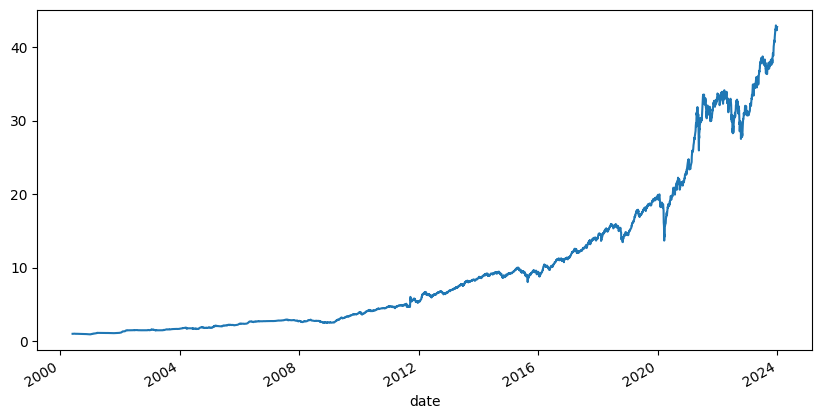

In [13]:
df['cum_returns'].plot(figsize=(10, 5))

<Axes: title={'center': 'Company Count'}, xlabel='date'>

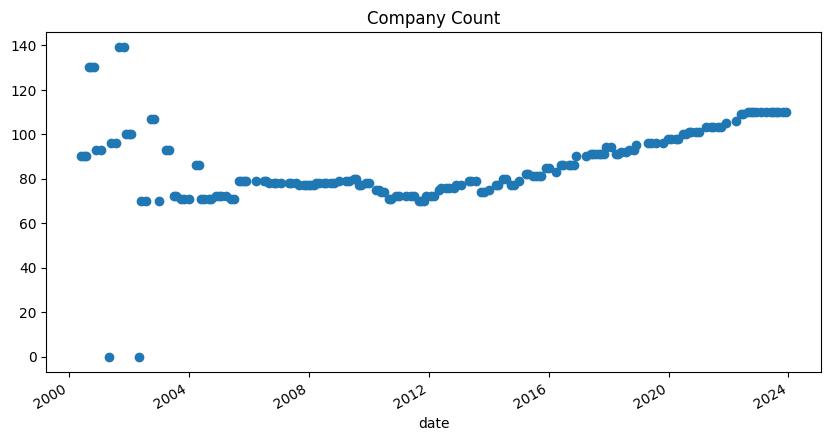

In [14]:
df['company_count'].plot(marker='o', linestyle='-', figsize=(10, 5), title='Company Count')

roe & PB 直接取交集

In [15]:
roe_pb_and = factor_analysis_two_factor_AND(['roe', 'pb'], factor_asc_dict, 4, factor_df_dict)

In [16]:
roe_pb_and_collection = sim_conditions(roe_pb_and, resample='M', data=data)

Backtesting progress: 100%|██████████| 4/4 [00:17<00:00,  4.48s/condition]


In [17]:
roe_pb_and_collection.get_stats()

,Quantile_1,Quantile_2,Quantile_3,Quantile_4
CAGR,0.128828,0.158481,0.031912,-0.052303
daily_sharpe,17.930000,17.200000,57.990000,30.430000
max_drawdown,-0.292950,-0.559689,-0.699383,-0.915012
avg_drawdown,-0.038763,-0.081771,-0.277666,-0.792792
win_ratio,0.328643,0.540015,0.445111,0.372835
ytd,0.401237,0.291672,0.252797,0.210829


In [18]:
roe_pb_and_collection.plot_creturns()

In [19]:
df = roe_pb_and_collection.reports['Quantile_1'].stock_data
df

,portfolio_returns,cum_returns,company_count
date,,,
2002-03-29,100.000000,1.000000,NaN
2002-04-01,99.857500,0.998575,NaN
2002-04-02,100.098112,1.000981,NaN
2002-04-03,100.101889,1.001019,NaN
2002-04-04,99.905823,0.999058,NaN
...,...,...,...
2023-12-25,1370.270224,13.702702,NaN
2023-12-26,1373.986369,13.739864,NaN
2023-12-27,1393.699194,13.936992,NaN


In [20]:
filtered_df = df[df['company_count'].notna()]
filtered_df

,portfolio_returns,cum_returns,company_count
date,,,
2002-04-30,98.346461,0.983465,183.0
2002-05-31,96.633448,0.966334,55.0
2002-07-31,95.923936,0.959239,55.0
2002-09-30,95.509619,0.955096,107.0
2002-10-31,95.590343,0.955903,107.0
...,...,...,...
2023-06-30,1173.582951,11.735830,42.0
2023-07-31,1169.628973,11.696290,42.0
2023-08-31,1132.721372,11.327214,28.0


加權排名法

In [21]:
result_AA_Q1 = result_AA['Quantile_1']
result_AA_Q1

company_symbol,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
2000-05-15,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2000-08-31,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
2000-11-15,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2001-03-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2001-05-15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2023-03-31,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True
2023-08-31,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2023-11-15,False,False,False,True,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [22]:
roe_pb_and_Q1 = roe_pb_and['Quantile_1']
roe_pb_and_Q1

company_symbol,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
2000-05-15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2000-08-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2000-11-15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2001-03-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2001-05-15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-03-31,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2023-08-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-11-15,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
# 預先準備好需要的因子資料
all_factor_df_dict = {
    'roe': data.get("report: roe"),
    'pb': data.get("report: pb"),
 }

# 決定因子排序的方向
factor_asc_dict = {
    'roe': False,
    'pb': True,
}

# 決定雙因子比重
factor_ratio_dict = {
    'roe': 0.5,
    'pb': 0.5,
}

# 決定因子切割的等份
quantile = 4

# 決定加權內插or排名法
method = 'interpolated'

In [24]:
roe_pb_ranked_Q1 = cal_factor_sum_df_interpolated(['roe', 'pb'], factor_ratio_dict, factor_asc_dict, quantile, method, all_factor_df_dict)['Quantile_1']
roe_pb_ranked_Q1

company_symbol,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
2000-05-15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2000-08-31,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2000-11-15,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2001-03-31,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,False,False,False
2001-05-15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-15,False,False,True,True,True,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,True
2023-03-31,False,False,True,True,True,True,False,False,True,False,...,True,False,True,False,False,True,False,False,False,True
2023-08-31,False,True,False,True,True,True,False,False,False,True,...,False,True,True,False,False,True,False,False,False,False
2023-11-15,False,True,True,True,True,True,False,False,False,True,...,False,True,False,False,True,False,False,False,True,False


In [25]:
dic = {
    'roe_pb_and': roe_pb_and_Q1,
    'result_AA': result_AA_Q1,
    'roe_pb_ranked': roe_pb_ranked_Q1
}

In [26]:
combined = sim_conditions(dic, resample='M', data=data)
combined.plot_creturns()

Backtesting progress: 100%|██████████| 3/3 [00:20<00:00,  6.87s/condition]


分隔線

In [27]:
# roe = data.get('report:roe').loc['2006-03-31':'2023-03-31']
# pb = data.get('report:pb').loc['2006-03-31':'2023-03-31']

# factor_df_dict = {
#     'roe': roe,
#     'pb': pb
# }

# factor_asc_dict = {
#     'roe': False,
#     'pb': True
# }

# # 決定雙因子比重
# factor_ratio_dict = {
#     'roe': 0.8,
#     'pb': 0.2,
# }

# # 決定因子切割的等份
# quantile = 10

# # 決定加權內插or排名法
# method = 'ranked'

# result_AA = cal_factor_sum_df_interpolated(['roe', 'pb'], factor_ratio_dict, factor_asc_dict, quantile, method, all_factor_df_dict)['Quantile_1']
# res1 = sim(result_AA, resample='M', data=data)
# res1.stock_data['cum_returns'].plot(figsize=(10, 5))